The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

Description of experiment

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

Attribute information

For each record in the dataset the following is provided:

Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
Triaxial Angular velocity from the gyroscope.
A 561-feature vector with time and frequency domain variables.
Its activity label.
An identifier of the subject who carried out the experiment.

road map:

we have data from acceleration from accelerometer
gyroscope
feasture vector

lets understand the data
come up with statistical analysis
hypothesis
visualization
preprocessing

modeling: classification:

LDA,SVM,tree based models

In [1]:
###### get the packages and the data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('D:\\human-activity-recognition-with-smartphones\\train.csv')

In [3]:
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train_data.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30,WALKING_UPSTAIRS


In [5]:
train_data.shape

(7352, 563)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [7]:
train_data.iloc[:,10:20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 10 columns):
tBodyAcc-max()-Y       7352 non-null float64
tBodyAcc-max()-Z       7352 non-null float64
tBodyAcc-min()-X       7352 non-null float64
tBodyAcc-min()-Y       7352 non-null float64
tBodyAcc-min()-Z       7352 non-null float64
tBodyAcc-sma()         7352 non-null float64
tBodyAcc-energy()-X    7352 non-null float64
tBodyAcc-energy()-Y    7352 non-null float64
tBodyAcc-energy()-Z    7352 non-null float64
tBodyAcc-iqr()-X       7352 non-null float64
dtypes: float64(10)
memory usage: 574.5 KB


In [8]:
train_data.iloc[0:10,0:10]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469
5,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469
6,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,-0.940987
7,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,-0.940987
8,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,-0.940598
9,0.280586,-0.009960,-0.106065,-0.994803,-0.972758,-0.986244,-0.995405,-0.973663,-0.985642,-0.940028


In [9]:
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [10]:
train_data.isnull().sum()

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
tBodyAcc-std()-Z                        0
tBodyAcc-mad()-X                        0
tBodyAcc-mad()-Y                        0
tBodyAcc-mad()-Z                        0
tBodyAcc-max()-X                        0
tBodyAcc-max()-Y                        0
tBodyAcc-max()-Z                        0
tBodyAcc-min()-X                        0
tBodyAcc-min()-Y                        0
tBodyAcc-min()-Z                        0
tBodyAcc-sma()                          0
tBodyAcc-energy()-X                     0
tBodyAcc-energy()-Y                     0
tBodyAcc-energy()-Z                     0
tBodyAcc-iqr()-X                        0
tBodyAcc-iqr()-Y                        0
tBodyAcc-iqr()-Z                        0
tBodyAcc-entropy()-X                    0
tBodyAcc-entropy()-Y              

In [11]:
train_data['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

In [12]:
# lests apply principle component analysis

PCA is a very useful tool to reduce the dimentions in the dataset 

total variance between the variables is found after geting the data
correlation is found and higer correlation means the variabels are similar 
eignvectors and eignvaluas are found which represnt the similar variabels in higher dimmention
new matrix and principle components are formed

In PCA if two vectors are similar then they are orthogonal in shape and 2nd principle is not orthogonal to first


In [13]:
train = train_data.iloc[:,0:562]

In [14]:
train.shape

(7352, 562)

In [15]:
train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.387052,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695,30


In [16]:
from sklearn.preprocessing import Normalizer

In [17]:
normal = Normalizer()

In [18]:
train = normal.fit_transform(train)

In [19]:
from sklearn.decomposition import PCA

In [20]:
#from sklearn.preprocessing import scale
%matplotlib inline

In [21]:
pca = PCA?

In [ ]:
pca = PCA

In [22]:
pca = PCA

In [23]:
pca = PCA

In [24]:
pca = PCA()

In [25]:
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
var = pca.explained_variance_ratio_
print(var)

[  4.90999458e-01   2.67688344e-01   2.90903704e-02   1.93695179e-02
   1.47203998e-02   1.19504826e-02   8.90048859e-03   8.31596975e-03
   6.42328176e-03   6.32991267e-03   5.69556209e-03   5.39315779e-03
   4.79871112e-03   4.16352934e-03   3.77028076e-03   3.53624521e-03
   3.34369186e-03   3.17822989e-03   3.06571949e-03   3.00389260e-03
   2.75930628e-03   2.69462211e-03   2.58047426e-03   2.45847056e-03
   2.23978827e-03   2.16654781e-03   2.11829142e-03   2.03513675e-03
   1.90772352e-03   1.88316016e-03   1.83743646e-03   1.80185440e-03
   1.65000123e-03   1.61600538e-03   1.58339816e-03   1.53988056e-03
   1.50400826e-03   1.46232821e-03   1.42505218e-03   1.34416476e-03
   1.28474849e-03   1.24187795e-03   1.18790605e-03   1.16452198e-03
   1.13339679e-03   1.07929299e-03   1.04242708e-03   1.01675467e-03
   9.73081946e-04   9.64198678e-04   9.56488164e-04   8.99588353e-04
   8.89668749e-04   8.64311951e-04   8.39766946e-04   8.07765987e-04
   7.93410674e-04   7.68185070e-04

In [27]:
var1 = np.cumsum(var)

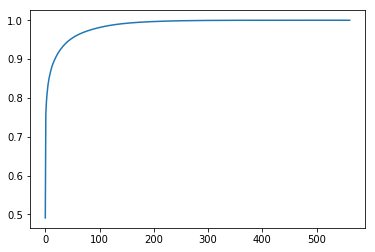

In [28]:
plt.plot(var1)

In [29]:
pca = PCA(n_components=100)

In [30]:
pca.fit(train)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [31]:
pca.components_

array([[  6.94773840e-03,  -3.57397999e-04,  -2.73619094e-03, ...,
         -5.94537751e-03,  -5.34519995e-03,  -7.90470518e-01],
       [  1.19081494e-02,  -1.15164354e-03,  -4.95845843e-03, ...,
          3.65321234e-02,   2.41093172e-02,  -2.73884834e-01],
       [  7.02182682e-03,  -8.27808226e-05,  -1.52079885e-03, ...,
         -2.19847912e-02,  -7.98971617e-03,  -1.90492702e-01],
       ..., 
       [ -1.69084244e-02,  -4.28577817e-03,   1.09260458e-02, ...,
         -3.93449949e-03,  -3.57678898e-02,   6.54977293e-03],
       [ -6.78293575e-02,  -3.05619663e-02,   6.75154047e-02, ...,
         -1.61827540e-02,  -3.52073115e-02,   2.40999502e-03],
       [ -1.00663188e-02,   6.01652495e-03,   6.11728697e-02, ...,
         -2.74001886e-02,  -1.68930375e-02,  -2.51060489e-05]])

In [32]:
x1 = pca.fit_transform(train)

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
L = LabelEncoder()

In [35]:
train_data['Activity']=L.fit_transform(train_data['Activity'])

In [36]:
train_data['Activity'].head()

0    2
1    2
2    2
3    2
4    2
Name: Activity, dtype: int64

In [37]:
from sklearn.cross_validation import train_test_split

C:\Users\amogh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [122]:
X_train,X_test,Y_train,Y_test = train_test_split(train,train_data['Activity'],train_size =0.7,random_state =42)

we cant go for logistic regression as there are more than two class in classification and more rows associated

LDA performs well : it uses mean and variance for each class and used bayes theorem for estimation of probabilities  


In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
ld = LinearDiscriminantAnalysis()

In [41]:
ld.fit(X_train,Y_train)

C:\Users\amogh\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [42]:
y_pred = ld.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
con = confusion_matrix?

In [ ]:
con = confusion_matrix

In [45]:
con = confusion_matrix

In [46]:
con = confusion_matrix

In [47]:
con = confusion_matrix(y_true=Y_test,y_pred=y_pred)

In [48]:
con

array([[428,   0,   0,   0,   0,   0],
       [  3, 361,  22,   0,   0,   0],
       [  0,  17, 394,   0,   0,   0],
       [  0,   0,   0, 363,   1,   2],
       [  0,   0,   0,   0, 309,   2],
       [  0,   0,   0,   1,   1, 302]], dtype=int64)

In [49]:
428+361+394+363+309+302

2157

In [50]:
2157+3+17+22+1+1+1+2+2

2206

In [51]:
2157/2206

0.9777878513145966

In [52]:
# lests go for tree based methods

Decision tree


Decision tree: its like a tree with main root on the top and branches and finally leaf at the bottom 

root is choosen by the information gain IG =  entropy before split - entropy after split 
entropy uncertanity in the data H = -E(-plog(p)) select the variabel with highest IG

we have rules that is support(frequency), confidence(true) ,lift(expected output) 

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
Decision = DecisionTreeClassifier?

In [ ]:
Decision = DecisionTreeClassifier

In [55]:
Decision = DecisionTreeClassifier

In [56]:
Decision = DecisionTreeClassifier(criterion='entropy')

In [57]:
Decision.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [58]:
y_pred = Decision.predict(X_test)

In [59]:
con = confusion_matrix(y_true=Y_test,y_pred=y_pred)

In [60]:
print(con)

[[428   0   0   0   0   0]
 [  0 360  26   0   0   0]
 [  0  15 396   0   0   0]
 [  0   0   0 351   5  10]
 [  0   0   0  10 282  19]
 [  0   0   0  16  12 276]]


In [61]:
con.diagonal().sum()

2093

In [62]:
con.sum()

2206

In [63]:
2091/2206


0.9478694469628286

In [64]:
Decision.predict_log_proba

<bound method DecisionTreeClassifier.predict_log_proba of DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')>

--------- now lests try something els from kaggle kernels of what others have done ----------------

In [65]:
import missingno as msno

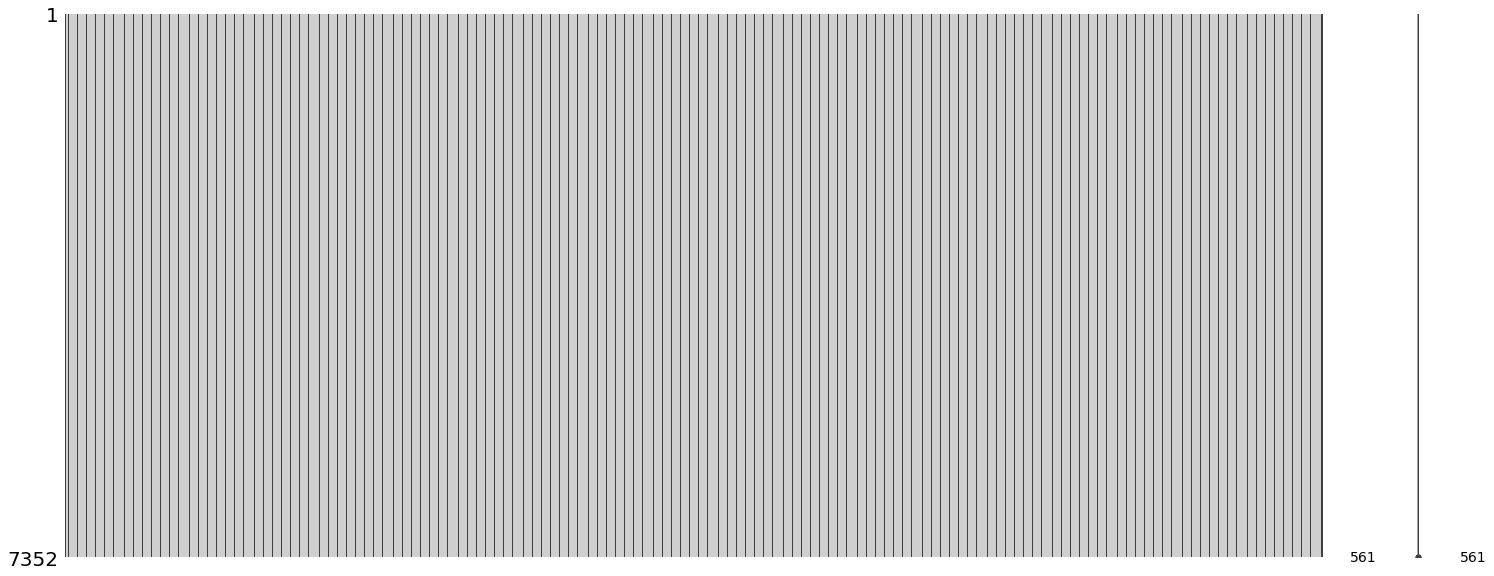

In [66]:
missing = msno.matrix(df = train_data.iloc[:,:561])

In [67]:
# following is done by jason liu

In [68]:
# here instead of dimentaionl reduction feature selection method is used

In [69]:
# tree based learning

In [70]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
ExtraTreesClassifier?
# this is like votting classifier 

In [72]:
from sklearn.feature_selection import SelectFromModel

In [73]:
feature = train

In [74]:
clf = ExtraTreesClassifier()

In [75]:
clf.fit(feature,train_data['Activity'])

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [76]:
model = SelectFromModel?

In [ ]:
model = SelectFromModel

In [77]:
model = SelectFromModel(clf,prefit=True)

In [78]:
new_features = model.transform(feature)

In [79]:
print(new_features.shape)

(7352, 98)


In [162]:
# because data is  normalized so i am geting 106 he got 91

In [82]:
from sklearn.svm import LinearSVC

In [83]:
sc = LinearSVC?

In [106]:
sc = LinearSVC(penalty='l1',dual=False)

In [107]:
sc_2=sc.fit(train,train_data['Activity'])

In [111]:
model_2 = SelectFromModel(sc_2,prefit=True)

In [112]:
new_feature = model_2.transform(feature)

In [113]:
new_feature.shape

(7352, 177)

In [114]:
# it looks like due to normalization and l1 norm we are getting higher values

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [118]:
classifier =[DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier]

In [119]:
from sklearn.metrics import accuracy_score

In [ ]:
acc = []
for c in classifier:
    
    fit1 = c.fit(X_train,Y_train)
    pred = fit1.predict(X_test)
    acc.append(accuracy_score(Y_test,pred))

In [127]:
accuracy_score?